# **Práctica 2 - Visualización de datos**
## Grupo 001 - Lunes 7-10 PM
## Equipo 9
+ 1842161 Torres Guerrero Saul Ángel
+ 1844656 Maldonado Ramirez Alejandra
+ 1857712 Morales Tovar Carlos de Jesús
+ 1941500 Espinosa Orrante Jesús Alejandro
+ 1857810 Rivera Castillo Saúl Andrés

## **Stock Exchange Data** 
URL: https://www.kaggle.com/mattiuzc/stock-exchange-data

## **Estadística básica de los datos**

In [ ]:
import pandas as pd
import numpy as np
import json
#Importando la base de datos bajo el nombre IP
IP = pd.read_csv("indexProcessed.csv", encoding='utf8')

In [ ]:
IP.shape

(104224, 9)

In [ ]:
#Mostrando las primeras 6 filas de la base de datos IP para visualizar una parte de la base
IP.head(6)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
5,HSI,1987-01-08,2603.300049,2603.300049,2603.300049,2603.300049,2603.300049,0.0,338.429006


In [ ]:
#Suma de todos los elementos de la columna Open(Precio de apertura)
IP['Open'].sum()


835392185.868491

In [ ]:
#Mostrar el promedio de la columna High(Precio mas alto durante el dia de negociacion)
IP['High'].mean()

8063.324234438219

In [ ]:
#Suma acululada del precio de cierre
IP['CloseUSD'].cumsum()

0         3.338790e+02
1         6.640920e+02
2         9.959040e+02
3         1.331811e+03
4         1.670734e+03
              ...     
104219    3.175235e+08
104220    3.175281e+08
104221    3.175328e+08
104222    3.175375e+08
104223    3.175423e+08
Name: CloseUSD, Length: 104224, dtype: float64

In [ ]:
#resumen estadistico de la columna closeUSD
IP['CloseUSD'].describe()

count    104224.000000
mean       3046.729177
std        3747.865623
min          10.204900
25%         320.460898
50%        1371.598486
75%        4383.045241
max       18934.376173
Name: CloseUSD, dtype: float64

In [ ]:
IP['Open'].count()

104224

In [ ]:
IP['Open'].min()

54.869999

In [ ]:
IP['Open'].max()

68775.0625

In [ ]:
IP['Open'].median()

5772.1401365

In [ ]:
IP['Open'].var()

83549899.33809762

In [ ]:
IP['Open'].std()

9140.563403756774

In [ ]:
IP['Open'].skew()

2.837045402781309

In [ ]:
IP['Open'].kurt()

10.843693455176231

In [ ]:
IP.corr()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Open,1.000000,0.999958,0.999942,0.999904,0.999904,0.129090,0.187904
High,0.999958,1.000000,0.999929,0.999954,0.999954,0.128926,0.187606
Low,0.999942,0.999929,1.000000,0.999958,0.999958,0.128964,0.188190
Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128971,0.187979
Adj Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128976,0.187980
Volume,0.129090,0.128926,0.128964,0.128971,0.128976,1.000000,0.506375
CloseUSD,0.187904,0.187606,0.188190,0.187979,0.187980,0.506375,1.000000


In [ ]:
IP.cov()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Open,8.354990e+07,8.405835e+07,8.301680e+07,8.354231e+07,8.354332e+07,5.224439e+12,6.437138e+06
High,8.405835e+07,8.457701e+07,8.352444e+07,8.405846e+07,8.405948e+07,5.249789e+12,6.466328e+06
Low,8.301680e+07,8.352444e+07,8.249667e+07,8.301858e+07,8.301959e+07,5.186334e+12,6.406185e+06
Close,8.354231e+07,8.405846e+07,8.301858e+07,8.355075e+07,8.355176e+07,5.219651e+12,6.439728e+06
Adj Close,8.354332e+07,8.405948e+07,8.301959e+07,8.355176e+07,8.355277e+07,5.219925e+12,6.439860e+06
Volume,5.224439e+12,5.249789e+12,5.186334e+12,5.219651e+12,5.219925e+12,1.960419e+19,8.402926e+12
CloseUSD,6.437138e+06,6.466328e+06,6.406185e+06,6.439728e+06,6.439860e+06,8.402926e+12,1.404650e+07


## **Gráficas**

In [ ]:
#Eliminando columnas redudantes (presentan la misma información)
NIP=IP.drop(columns=['Open','High','Low','Close','Adj Close'])
NIP.head(6)

,Index,Date,Volume,CloseUSD
0,HSI,1986-12-31,0.0,333.879006
1,HSI,1987-01-02,0.0,330.213013
2,HSI,1987-01-05,0.0,331.811987
3,HSI,1987-01-06,0.0,335.906987
4,HSI,1987-01-07,0.0,338.923013
5,HSI,1987-01-08,0.0,338.429006


### **Graficar datos univariantes.**
### **Grafica de barras y datos categoricos:**


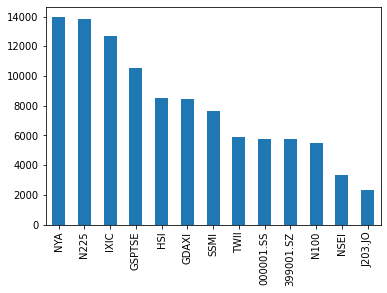

In [ ]:
NIP['Index'].value_counts().plot.bar()

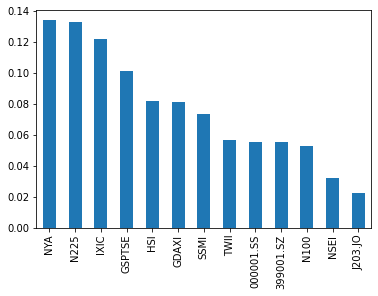

In [ ]:
(NIP['Index'].value_counts() / len(NIP)).plot.bar()

### Las **gráficas de lineas** no se pueden realizar porque nuestra base de datos no cuenta con valores unicos que puedan estar en el eje x.

### **Histogramas**

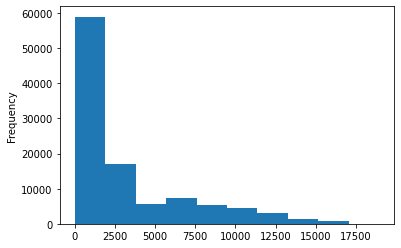

In [ ]:
NIP['CloseUSD'].plot.hist()

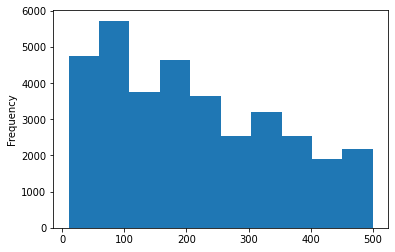

In [ ]:
NIP[NIP['CloseUSD'] < 500]['CloseUSD'].plot.hist()

### **Graficar datos bi-variantes.**
### **Scatter plot**

In [ ]:
NYA=NIP[NIP.Index=="NYA"]

In [ ]:
NNIP = pd.read_csv("indexProcessed.csv",parse_dates=['Date'],index_col= ['Date'])

In [ ]:
NNYA=NNIP[NNIP.Index=="NYA"]
NNYA.head(5)

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


In [ ]:
ENYA=NNYA.drop(columns=['Open','High','Low','Close','Adj Close'])
ENYA.head(6)

,Index,Volume,CloseUSD
Date,,,
1965-12-31,NYA,0.0,528.690002
1966-01-03,NYA,0.0,527.210022
1966-01-04,NYA,0.0,527.840027
1966-01-05,NYA,0.0,531.119995
1966-01-06,NYA,0.0,532.070007
1966-01-07,NYA,0.0,532.599976


In [ ]:
IPP = ENYA['2020-01-01':'2021-01-01']
IPP.head()

,Index,Volume,CloseUSD
Date,,,
2020-01-02,NYA,3.458250e+09,14002.49023
2020-01-03,NYA,3.461290e+09,13917.04981
2020-01-06,NYA,3.674070e+09,13941.79981
2020-01-07,NYA,3.420380e+09,13898.45020
2020-01-08,NYA,3.720890e+09,13934.44043


In [ ]:
IPP.reset_index()

,Date,Index,Volume,CloseUSD
0,2020-01-02,NYA,3.458250e+09,14002.49023
1,2020-01-03,NYA,3.461290e+09,13917.04981
2,2020-01-06,NYA,3.674070e+09,13941.79981
3,2020-01-07,NYA,3.420380e+09,13898.45020
4,2020-01-08,NYA,3.720890e+09,13934.44043
...,...,...,...,...
248,2020-12-24,NYA,1.885090e+09,14382.50000
249,2020-12-28,NYA,3.527460e+09,14405.76953
250,2020-12-29,NYA,3.387030e+09,14397.91992
251,2020-12-30,NYA,3.145200e+09,14477.48047


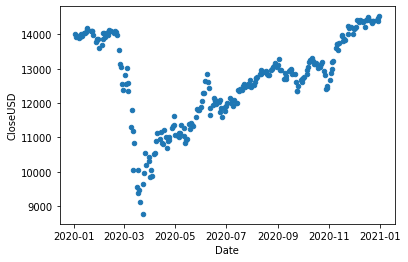

In [ ]:
IPP.reset_index().plot.scatter(x='Date', y='CloseUSD')

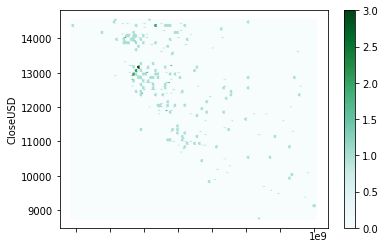

In [ ]:
IPP.reset_index().plot.hexbin(x='Volume', y='CloseUSD')

### **Staked plot**

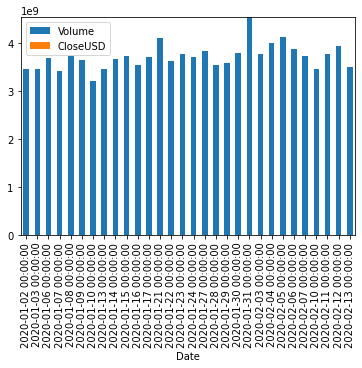

In [ ]:
IPP.head(30).plot.bar(stacked=True)

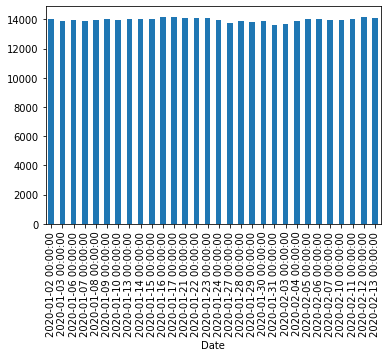

In [ ]:
#CloseUSD de la gráfica anterior
IPP["CloseUSD"].head(30).plot.bar(stacked=True)

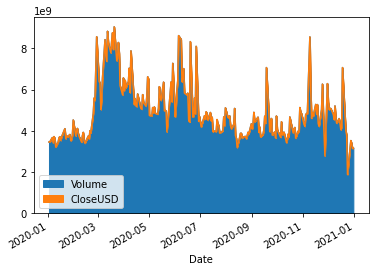

In [ ]:
IPP.plot.area()

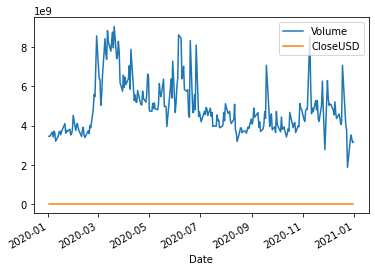

In [ ]:
IPP.plot.line()

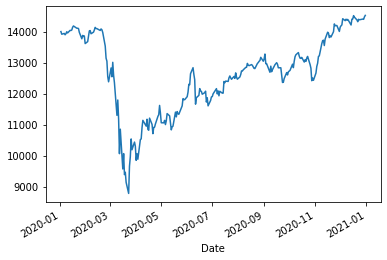

In [ ]:
#CloseUSD de la gráfica anterior
IPP["CloseUSD"].plot.line()

### **Usando libreria seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


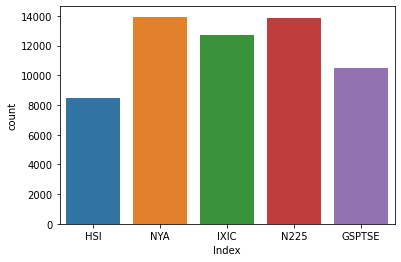

In [ ]:
import seaborn as sns
T1=NIP[(NIP["Index"]=="NYA") | (NIP["Index"]=="N225")| (NIP["Index"]=="HSI") | (NIP["Index"]=="IXIC") | (NIP["Index"]=="GSPTSE")]
sns.countplot(T1["Index"])

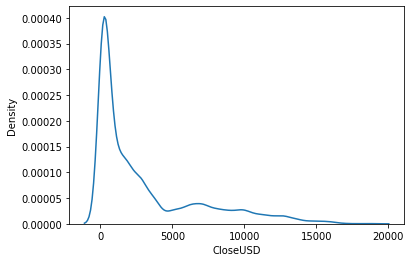

In [ ]:
sns.kdeplot(IP.CloseUSD)

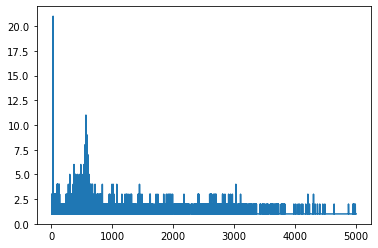

In [ ]:
IP[IP["CloseUSD"]<5000]["CloseUSD"].value_counts().sort_index().plot.line()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


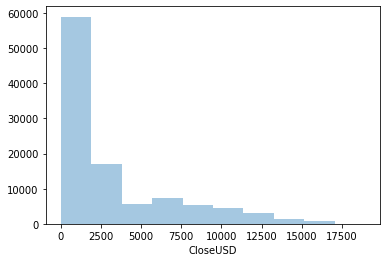

In [ ]:
sns.distplot(IP["CloseUSD"], bins=10, kde=False)

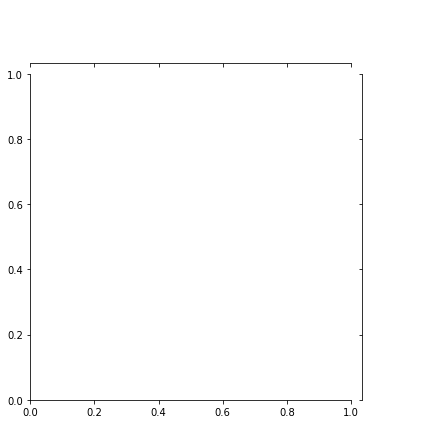

In [ ]:
sns.jointplot(x="CloseUSD", y="Volume", data=IPP[IPP["CloseUSD"]<7000])

### **Box plot**

In [ ]:
NNIP = pd.read_csv("indexProcessed.csv",parse_dates=['Date'],index_col=['Date'])

In [ ]:
TI=NNIP[(NNIP["Index"]=="NYA") | (NNIP["Index"]=="N225")| (NNIP["Index"]=="HSI") | (NNIP["Index"]=="IXIC") | (NNIP["Index"]=="GSPTSE")]
TI.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [ ]:
NTI=TI.drop(columns=['Open','High','Low','Close','Adj Close'])
NTI.head()

,Index,Volume,CloseUSD
Date,,,
1986-12-31,HSI,0.0,333.879006
1987-01-02,HSI,0.0,330.213013
1987-01-05,HSI,0.0,331.811987
1987-01-06,HSI,0.0,335.906987
1987-01-07,HSI,0.0,338.923013


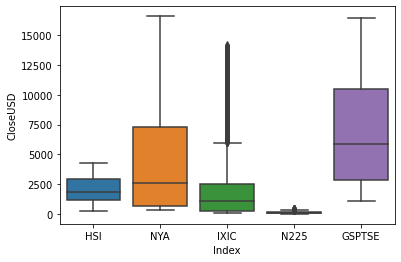

In [ ]:
sns.boxplot(x='Index', y='CloseUSD', data=NTI)

(Nota: Solo se tomaron en cuenta los 5 índices con más observaciones dentro de la base)

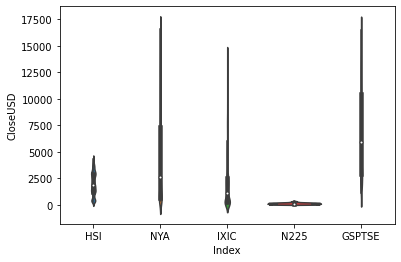

In [ ]:
sns.violinplot(x='Index', y='CloseUSD', data=NTI)

In [ ]:
#Solo el índice NYA enfocandonos en el periodo (2020)
TNYA=NNIP[(NNIP["Index"]=="NYA")]
NNYA=TNYA.drop(columns=['Open','High','Low','Close','Adj Close'])
NNYA.head()

,Index,Volume,CloseUSD
Date,,,
1965-12-31,NYA,0.0,528.690002
1966-01-03,NYA,0.0,527.210022
1966-01-04,NYA,0.0,527.840027
1966-01-05,NYA,0.0,531.119995
1966-01-06,NYA,0.0,532.070007


In [ ]:
TTNYA = NNYA['2020-01-01':'2021-01-01']
TTNYA.head()

,Index,Volume,CloseUSD
Date,,,
2020-01-02,NYA,3.458250e+09,14002.49023
2020-01-03,NYA,3.461290e+09,13917.04981
2020-01-06,NYA,3.674070e+09,13941.79981
2020-01-07,NYA,3.420380e+09,13898.45020
2020-01-08,NYA,3.720890e+09,13934.44043


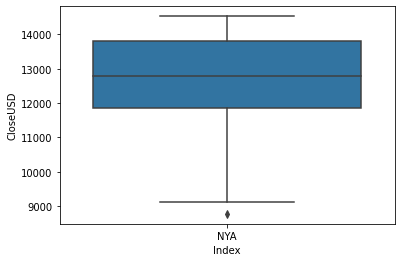

In [ ]:
sns.boxplot(x='Index', y='CloseUSD', data=TTNYA)

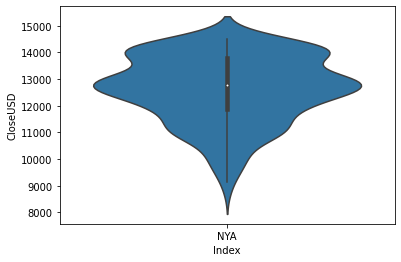

In [ ]:
sns.violinplot(x='Index', y='CloseUSD', data=TTNYA)

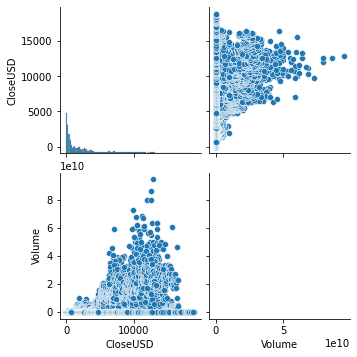

In [ ]:
import pandas_profiling
sns.pairplot(IP[['Date','Index', 'CloseUSD','Volume']])

#### **Graficar datos multi-variantes.**

No hay suficientes variables útiles para graficas multi-variantes.

## **Countries Life Expectancy**
URL: https://www.kaggle.com/brendan45774/countries-life-expectancy

## **Estadística básica de los datos**

In [ ]:
import pandas as pd
import numpy as np
import json
#Importando la base de datos bajo el nombre LE
LE = pd.read_csv("Life expectancy.csv", encoding='utf8')

In [ ]:
LE.shape

(3253, 3)

In [ ]:
#Mostrando las primeras 6 filas de la base de datos LE para visualizar una parte de la base
LE.head(6)

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
5,Australia,1807,34.049999


In [ ]:
#Suma de todos los elementos de la columna Life expectancy(Esperanza de vida)
LE["Life expectancy"].sum()

158357.27508420002

In [ ]:
#Mostrar el promedio de la columna Life expectancy(Esperanza de vida)
LE["Life expectancy"].mean()

48.680379675437884

In [ ]:
#Suma acumulada de los años de vida esperados 
LE["Life expectancy"].cumsum()

0           34.049999
1           68.099998
2          102.149997
3          136.199996
4          170.249995
            ...      
3248    158041.645079
3249    158120.605078
3250    158199.545080
3251    158278.415083
3252    158357.275084
Name: Life expectancy, Length: 3253, dtype: float64

In [ ]:
#resumen estadistico de la columna Life expectancy
LE["Life expectancy"].describe()

count    3253.000000
mean       48.680380
std        17.965669
min         8.108836
25%        32.000000
50%        41.880001
75%        66.820000
max        83.940002
Name: Life expectancy, dtype: float64

In [ ]:
LE["Life expectancy"].count()

3253

In [ ]:
LE["Life expectancy"].min()

8.1088362

In [ ]:
LE["Life expectancy"].max()

83.940002

In [ ]:
LE["Life expectancy"].median()

41.880001

In [ ]:
LE["Life expectancy"].var()

322.7652796192206

In [ ]:
LE["Life expectancy"].std()

17.965669473170784

In [ ]:
LE["Life expectancy"].skew()

0.4320957132582497

In [ ]:
LE["Life expectancy"].kurt()

-1.2344074833769916

In [ ]:
LE.corr()

,Year,Life expectancy
Year,1.000000,0.843842
Life expectancy,0.843842,1.000000


In [ ]:
LE.cov()

,Year,Life expectancy
Year,3920.508238,949.239768
Life expectancy,949.239768,322.765280


## **Gráficas**

In [ ]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
NLE = pd.read_csv("Life expectancy.csv", index_col=0)
NLE.head()

,Year,Life expectancy
Entity,,
Australia,1802,34.049999
Australia,1803,34.049999
Australia,1804,34.049999
Australia,1805,34.049999
Australia,1806,34.049999


In [ ]:
NLE.columns

Index(['Year', 'Life expectancy'], dtype='object')

### **Graficar datos univariantes.**
### **Grafica de barras y datos categoricos:**


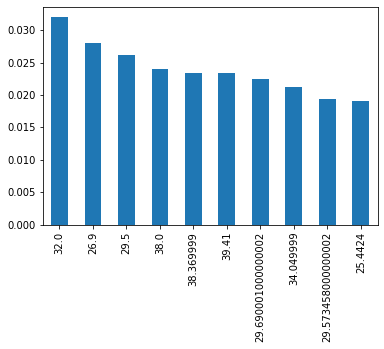

In [ ]:
(NLE['Life expectancy'].value_counts().head(10) / len(NLE)).plot.bar()

Claramente vemos que el promedio de vida de 32 años es el que mas se repite entre todos los paises esto porque toma desde los años de 1800 a 2016 

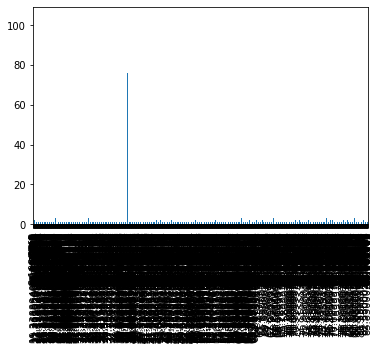

In [ ]:
NLE['Life expectancy'].value_counts().sort_index().plot.bar()

Claramente hace mucho ruido este histograma asi que realizaremos un analisis mas congruente 

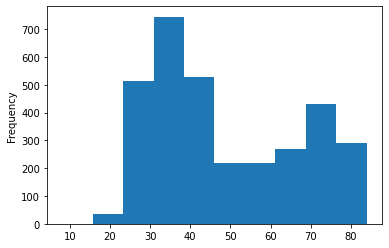

In [ ]:
NLE['Life expectancy'].plot.hist()

Como podemos ver las edades promedio de vida que mas se repiten son de 30 a 40 en un  periodo de 1800 a 2016

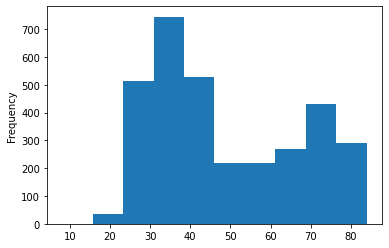

In [ ]:
NLE[NLE['Life expectancy'] < 200]['Life expectancy'].plot.hist()

### **Graficar datos bi-variantes.**
### **Scatter plot**


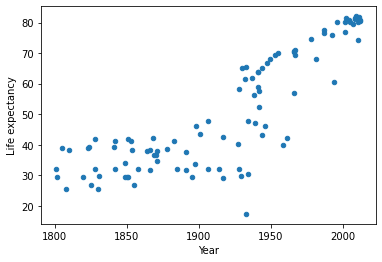

In [ ]:
NLE[NLE['Life expectancy'] < 100].sample(100).plot.scatter(x='Year', y='Life expectancy')

Esto significa que entre mas reciente sea el año aumenta la esperanza de vida promedio 

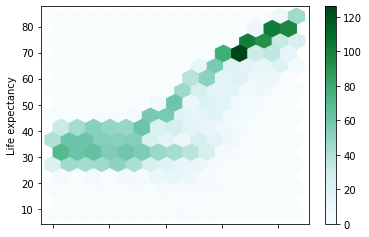

In [ ]:
NLE[NLE['Life expectancy'] < 100].plot.hexbin(x='Year', y='Life expectancy', gridsize=15)

Como se puede ver en el periodo de 1950 a 2000 se presenta una mayor consentracion de cluster

### **Stacked plots**


Aqui usamos un resumen de los datos la Esperanza de vida para poder realizar la grafica.

In [59]:
import pandas as pd
import numpy as np
import json
#Importando la base de datos bajo el nombre IP
LER = pd.read_csv("Life expectancyResumencopia.csv", encoding='utf8')

In [60]:
LER = pd.read_csv("Life expectancyResumencopia.csv",index_col=0)

In [61]:
LER.head()

,Entity,Life expectancy
Year,,
2000,China,69.940002
2001,China,70.220001
2002,China,70.519997
2003,China,71.220001
2004,China,71.779999


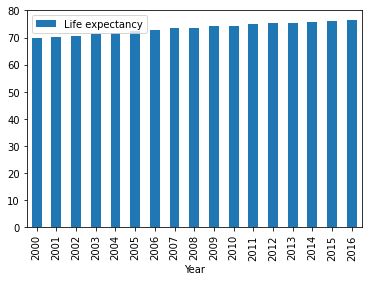

In [62]:
LER.plot.bar(stacked=True)

Como podemos ver la esperanza de vida de China conforme los años a ido aumentando 

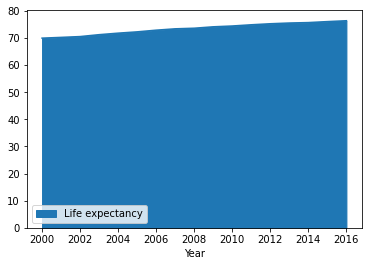

In [64]:
LER.plot.area()

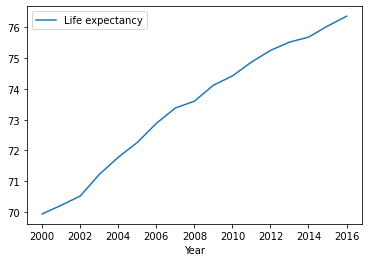

In [65]:
LER.plot.line()

In [66]:
import seaborn as sns

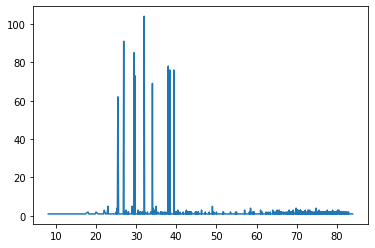

In [68]:
NLE[NLE['Life expectancy'] < 200]['Life expectancy'].value_counts().sort_index().plot.line()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


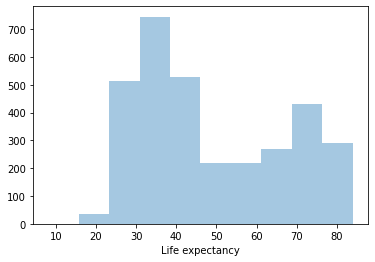

In [70]:
sns.distplot(NLE['Life expectancy'], bins=10, kde=False)

### **Box plots**


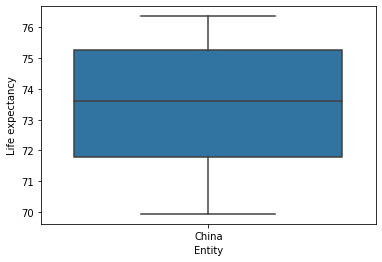

In [94]:
sns.boxplot(x='Entity', y='Life expectancy', data=LER)

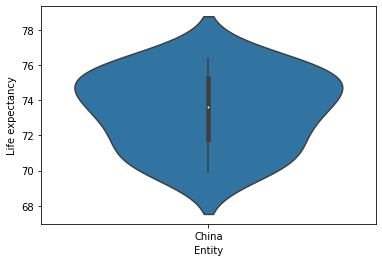

In [95]:
sns.violinplot(x='Entity', y='Life expectancy', data=LER)

####**Graficas multi-variantes**

No hay suficientes variables útiles para graficas multi-variantes.